In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


In [4]:
#Importing the data
dataEDA=pd.read_csv("hour.csv")

In [43]:
#checking the head of the dataset
dataEDA.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [6]:
#cheking the datatype
dataEDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
#checking missing values 
dataEDA.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#checking duplicated 
dataEDA.duplicated().sum()

0

In [9]:
df_trainEx, df_test =train_test_split(dataEDA , test_size = 0.2 , random_state=0)

In [10]:
# Rename columns
df_trainEx = dataEDA.rename(columns = {'instant':'rec_id', 'dteday':'datetime'
                                       ,'weathersit':'weather', 'cnt':'total_count'
                                       , 'dteday':'datetime','mnth':'month','temp':'temperature'
                                       ,'holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity'
                                       ,'yr':'year'})




In [47]:
df_trainEx.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

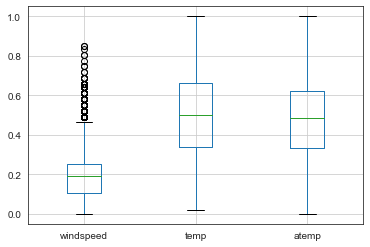

In [48]:
boxplot = dataEDA.boxplot(column=['windspeed','temp','atemp'])


In [12]:
Q1 = df_trainEx.quantile(0.25)
Q3 = df_trainEx.quantile(0.75)

In [13]:
IQR = Q3 - Q1
train_without_outliers =df_trainEx[~((df_trainEx < (Q1 - 1.5 * IQR)) |(df_trainEx > (Q3 + 1.5 * IQR))).any(axis=1)]

In [14]:
train_without_outliers.dropna(inplace=True)

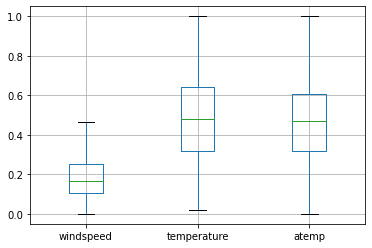

In [15]:
boxplot = train_without_outliers.boxplot(column=['windspeed','temperature','atemp'])

In [16]:
#change value in each column 
df_trainEx['season'] = df_trainEx['season'].map({1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'})
df_trainEx['year'] = df_trainEx['year'].map({0:'2011', 1:'2012'})
df_trainEx['is_holiday'] = df_trainEx['is_holiday'].map({0:'No', 1:'Yes'})
df_trainEx['weekday'] = df_trainEx['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df_trainEx['is_workingday'] = df_trainEx['is_workingday'].map({0:'No', 1:'Yes'})
df_trainEx['weather'] = df_trainEx['weather'].map({1:'Clear', 2:'Cloudy', 3:'Rain', 4:'Storm'})




In [17]:
df_trainEx.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hr', 'is_holiday',
       'weekday', 'is_workingday', 'weather', 'temperature', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [18]:
df_trainEx.head()

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Winter,2011,1,0,No,Sunday,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,1,1,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,1,2,No,Sunday,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Winter,2011,1,3,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Winter,2011,1,4,No,Sunday,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
df_trainEx.sample(5)

,rec_id,datetime,season,year,month,hr,is_holiday,weekday,is_workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,total_count
1917,1918,2011-03-25,Spring,2011,3,16,No,Saturday,Yes,Cloudy,0.34,0.3030,0.34,0.2985,23,127,150
6599,6600,2011-10-07,Fall,2011,10,13,No,Saturday,Yes,Clear,0.60,0.6212,0.46,0.0000,95,210,305
16613,16614,2012-11-30,Fall,2012,11,0,No,Saturday,Yes,Clear,0.26,0.2576,0.70,0.1642,4,48,52
4330,4331,2011-07-04,Summer,2011,7,8,Yes,Tuesday,No,Clear,0.70,0.6667,0.74,0.1045,42,44,86
15773,15774,2012-10-24,Fall,2012,10,10,No,Thursday,Yes,Cloudy,0.54,0.5152,0.73,0.0000,29,142,171


In [20]:
df_trainEx.describe()

,rec_id,month,hr,temperature,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
df_trainEx.season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [22]:
df_trainEx.season.value_counts()

Summer    4496
Spring    4409
Winter    4242
Fall      4232
Name: season, dtype: int64

In [23]:
df_trainEx.year.unique()

array(['2011', '2012'], dtype=object)

In [24]:
df_trainEx.year.value_counts()

2012    8734
2011    8645
Name: year, dtype: int64

In [25]:
df_trainEx.weekday.unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [26]:
df_trainEx.weekday.value_counts()

Sunday       2512
Monday       2502
Saturday     2487
Tuesday      2479
Thursday     2475
Friday       2471
Wednesday    2453
Name: weekday, dtype: int64

In [27]:
df_trainEx.is_holiday.unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df_trainEx.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

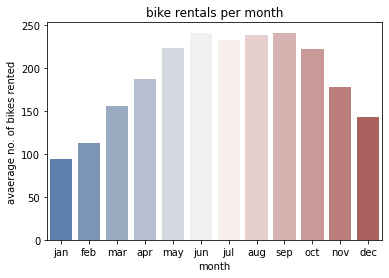

In [29]:
months = 'jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec'.split(',')
ax = sns.barplot('month', 'total_count', data=df_trainEx, estimator=np.mean, ci=None, palette="vlag")
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('month')
ax.set_xticklabels(months)

plt.title('bike rentals per month')

plt.show()

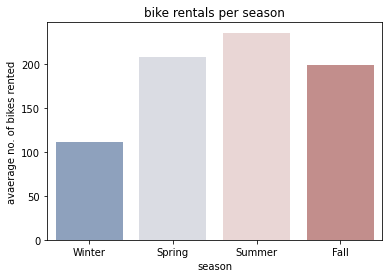

In [30]:
#season = 'Springer,Summer,Fall,Winter'.split(',')
ax = sns.barplot('season', 'total_count', data=df_trainEx, estimator=np.mean, ci=None, palette="vlag")
ax.set_ylabel('avaerage no. of bikes rented')
ax.set_xlabel('season')
#ax.set_xticklabels(season)

plt.title('bike rentals per season')

plt.show()

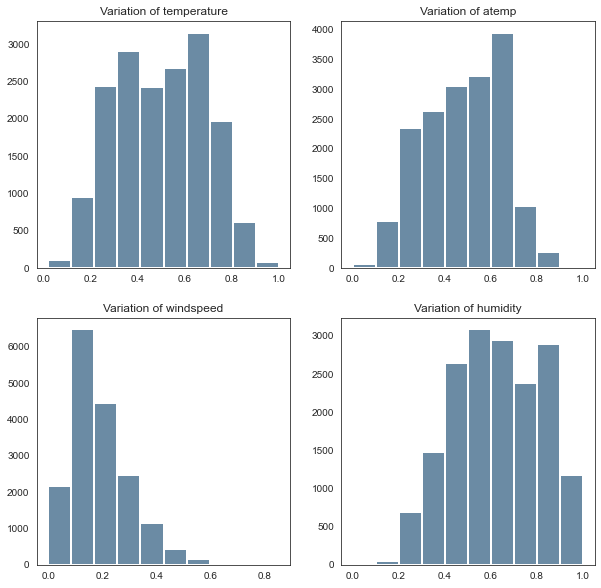

In [52]:
df_trainEx.temperature.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temperature",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="atemp",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df_trainEx,linewidth=2,color='xkcd:gray blue')
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

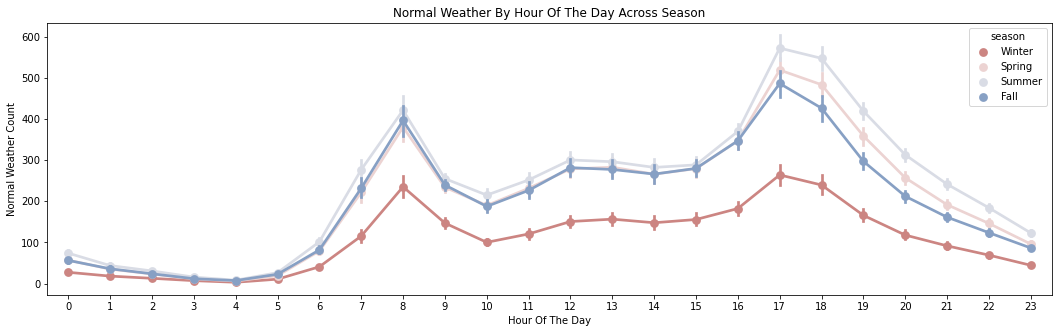

In [32]:
fig, ax = plt.subplots(figsize=(18, 5))
#seasons = ['spring', 'summer', 'fall', 'winter']
#ax.set_xticklabels(seasons)
sns.pointplot(x=df_trainEx["hr"], y=df_trainEx["total_count"], hue=df_trainEx["season"], ax=ax, palette='vlag_r')
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

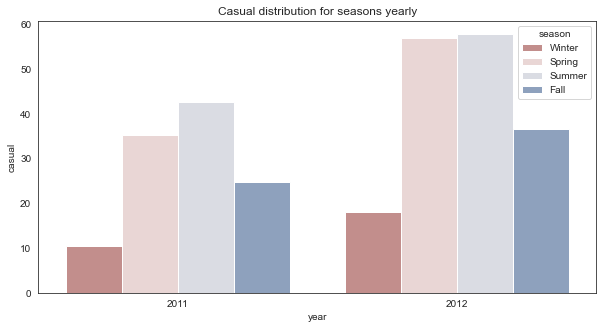

In [49]:
fig,ax=plt.subplots(figsize=(10,5))
sns.set_style('white')
sns.barplot(x='year',y='casual',data=df_trainEx,hue='season',ax=ax, palette='vlag_r',ci=None)
Years = '2011,2012'.split(',')
ax.set_xticklabels(Years)
ax.set_title('Casual distribution for seasons yearly')
plt.show()

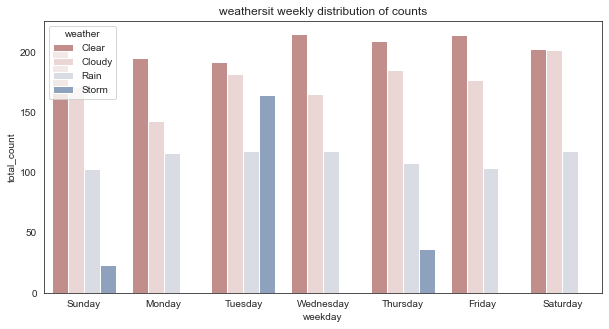

In [50]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='weekday',y='total_count',data=df_trainEx,hue='weather',ax=ax, palette="vlag_r",ci=None)
ax.set_title('weathersit weekly distribution of counts')
plt.show()

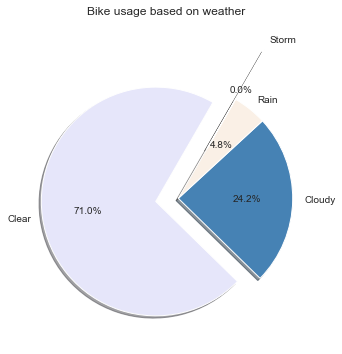

In [37]:
plt.figure(figsize=(5, 6))

labels = 'Clear', 'Cloudy', 'Rain', 'Storm'
sizes = df_trainEx.total_count.groupby(df_trainEx.weather).sum().tolist()
colors = ['lavender', 'steelblue', 'linen', 'silver']
explode = (0.2, 0, 0, 0.5)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.title('Bike usage based on weather')
plt.show()

In [36]:
data=df_trainEx.drop(['rec_id','datetime','casual','registered','month','humidity', 'is_holiday','weekday','is_workingday', 'atemp'], axis=1)





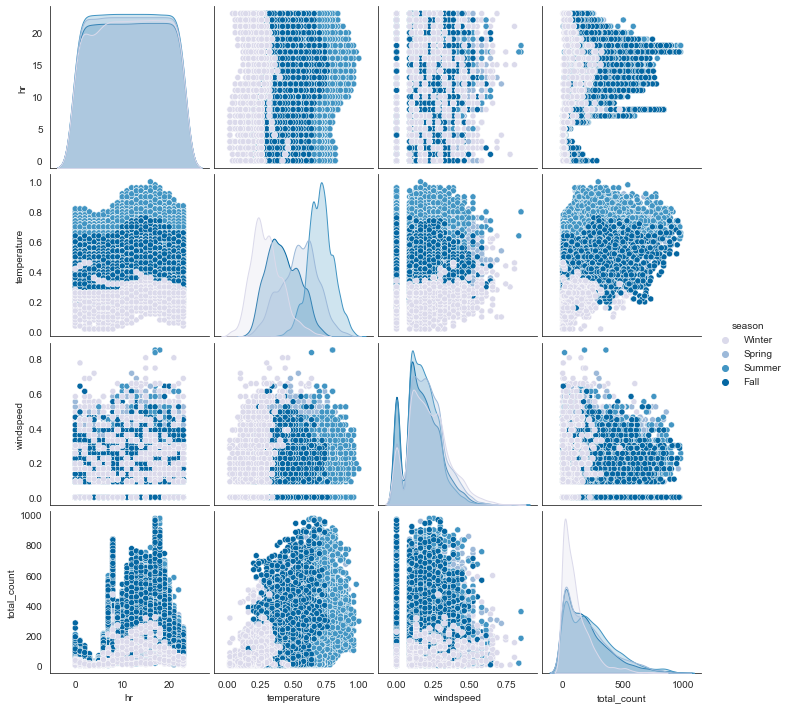

In [41]:
sns.pairplot(data,hue='season',palette='PuBu');

In [55]:
data['windspeed']=data['windspeed'].replace(0, np.nan)
data['temperature']=data['temperature'].replace(0, np.nan)
data['humidity']=data['humidity'].replace(0, np.nan)

In [56]:
data=data.dropna(subset=['windspeed', 'temperature','humidity'])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15177 entries, 5 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         15177 non-null  int64  
 1   datetime       15177 non-null  object 
 2   season         15177 non-null  int64  
 3   year           15177 non-null  int64  
 4   month          15177 non-null  int64  
 5   hr             15177 non-null  int64  
 6   is_holiday     15177 non-null  int64  
 7   weekday        15177 non-null  int64  
 8   is_workingday  15177 non-null  int64  
 9   weather        15177 non-null  int64  
 10  temperature    15177 non-null  float64
 11  atemp          15177 non-null  float64
 12  humidity       15177 non-null  float64
 13  windspeed      15177 non-null  float64
 14  casual         15177 non-null  int64  
 15  registered     15177 non-null  int64  
 16  total_count    15177 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 

In [59]:
#sns.pairplot(data,hue='season',palette='PuBu');

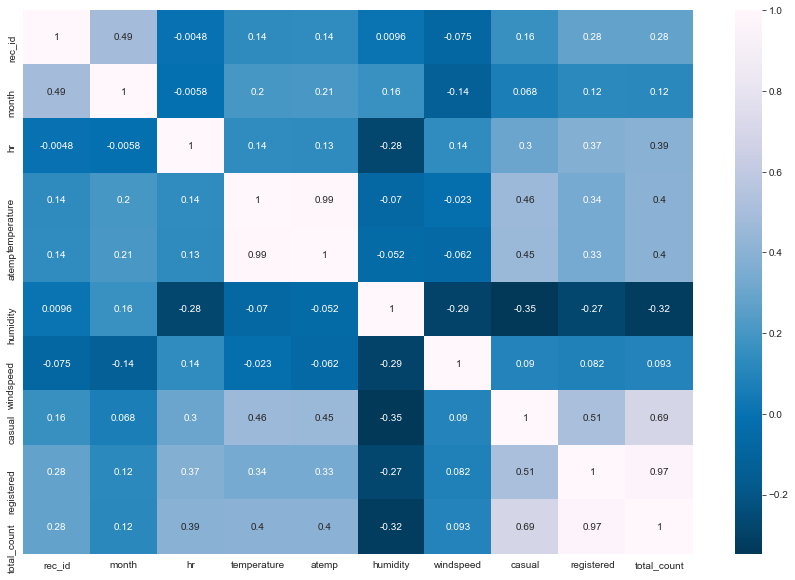

In [44]:
plt.subplots(figsize=(15,10))
sns.heatmap(df_trainEx.corr(), annot=True, cmap='PuBu_r');

In [53]:
data=pd.read_csv("hour.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [54]:


data = data.rename(columns = {'instant':'rec_id', 'dteday':'datetime','weathersit':'weather', 'cnt':'total_count', 'dteday':'datetime','mnth':'month','temp':'temperature','holiday':'is_holiday', 'workingday':'is_workingday','hum':'humidity','yr':'year'})


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rec_id         17379 non-null  int64  
 1   datetime       17379 non-null  object 
 2   season         17379 non-null  int64  
 3   year           17379 non-null  int64  
 4   month          17379 non-null  int64  
 5   hr             17379 non-null  int64  
 6   is_holiday     17379 non-null  int64  
 7   weekday        17379 non-null  int64  
 8   is_workingday  17379 non-null  int64  
 9   weather        17379 non-null  int64  
 10  temperature    17379 non-null  float64
 11  atemp          17379 non-null  float64
 12  humidity       17379 non-null  float64
 13  windspeed      17379 non-null  float64
 14  casual         17379 non-null  int64  
 15  registered     17379 non-null  int64  
 16  total_count    17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 